In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Logistic Regression

In [63]:
df = pd.read_csv('imbd_log.csv')

In [64]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,...,"Documentary,Short",1.945910,1.791759,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",3.091042,0.0,1.098612,['silent'],0.0


In [65]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(['averageRating'], axis=1)
numeric_df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0
4,1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,0.0,0,0,21,4.204693,1.945910,1.791759,3.091042,0.0,1.098612,0.0


In [66]:
x = numeric_df.values
y = df['rating']

# Data Partitioning

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = StratifiedKFold()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(random_state=0, max_iter=1000, solver='saga', penalty=None)
grid_search = GridSearchCV(clf,
    param_grid, 
    cv=StratifiedKFold(),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000, random_state=0,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'l1', 'None']},
             scoring='accuracy')

In [73]:
best_model = grid_search.best_estimator_

In [82]:
grid_search.cv_results_ 

{'mean_fit_time': array([4.06843840e+01, 3.82841529e+01, 1.42102718e-02, 1.21088005e+02,
        1.03740715e+02, 1.55842781e-02, 2.70591456e+02, 7.67137782e+02,
        2.78593540e-02, 7.27535026e+02, 8.39494658e+02, 3.99341583e-02,
        4.75003031e+02, 8.17316218e+02, 1.72751427e-02, 4.33969864e+02,
        6.30407291e+02, 4.46979523e-02]),
 'std_fit_time': array([3.93173633e+00, 6.36033614e+00, 3.94808532e-03, 1.72418920e+01,
        2.12186749e+01, 3.15632218e-03, 7.55313971e+00, 1.55686305e+02,
        8.03368717e-03, 1.39811137e+02, 1.95059967e+02, 4.19451300e-02,
        6.65633336e+01, 1.14394876e+02, 8.55764045e-04, 5.10219377e+01,
        1.32198318e+02, 3.56904016e-02]),
 'mean_score_time': array([0.03123569, 0.03302746, 0.        , 0.03197327, 0.02565436,
        0.        , 0.06342893, 0.10164671, 0.        , 0.05649877,
        0.09601512, 0.        , 0.04502859, 0.05955963, 0.        ,
        0.06306887, 0.04980936, 0.        ]),
 'std_score_time': array([0.00573619, 

In [83]:
best_model.intercept_

array([-4.51009326, -2.55272277, -1.38743112, -0.22953462,  0.73184087,
        1.68366258,  2.39999821,  2.59227001,  1.69422086, -0.42221077])

In [84]:
best_model.coef_

array([[ 3.04121722e-01, -3.48098842e-01,  1.19053069e-02,
         3.04934027e-01, -8.12309200e-01,  1.14648924e-01,
        -9.71107495e-02, -2.76689949e-01, -8.36216431e-02,
         1.46883223e-01, -1.81490216e-01,  4.30654052e-01,
        -2.15006911e-01, -5.80703189e-02, -4.78264628e-01,
        -1.28840864e-01,  8.32852172e-02, -5.42147458e-02,
         7.41435542e-02],
       [ 1.72775882e-01,  6.98350079e-02, -2.96478640e-01,
         6.13188652e-01, -5.57280380e-01, -1.45242721e-01,
        -1.14702033e+00,  1.05641678e-01, -2.19565558e-01,
         5.57707275e-02, -8.80398741e-02,  3.95417350e-02,
         1.44590597e-01,  2.03555770e-02, -1.62819764e-01,
        -3.52122594e-02, -4.32753532e-03, -1.80604739e-01,
        -1.10849552e-01],
       [ 2.37741484e-02,  1.50619395e-01, -2.69084221e-01,
        -1.21168716e-02, -7.26473788e-02,  2.14770301e-02,
        -2.96949543e-01,  2.70794017e-01, -2.18576131e-01,
         4.54783238e-02,  7.35513017e-04, -2.37003466e-01,
    

In [74]:
y_pred = best_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3517610343290236
F1-score [0.         0.         0.         0.         0.00145666 0.11187916
 0.32305866 0.50345011 0.00389571 0.        ]


c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.10      0.00      0.00      2726
      (5, 6]       0.31      0.07      0.11      6398
      (6, 7]       0.31      0.34      0.32     11709
      (7, 8]       0.37      0.78      0.50     14567
      (8, 9]       0.24      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.35     44860
   macro avg       0.13      0.12      0.09     44860
weighted avg       0.29      0.35      0.26     44860



c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
# Return probability estimates for the test data X.
y_test_pred_proba = best_model.predict_proba(x_test)
y_test_pred_proba[0:10]

array([[2.33573961e-04, 3.95426851e-03, 7.74003772e-03, 2.83251624e-02,
        8.83230394e-02, 2.09357147e-01, 3.06801196e-01, 2.96644357e-01,
        5.57848499e-02, 2.83636776e-03],
       [4.97151107e-04, 1.70131166e-03, 7.46739081e-03, 1.87438947e-02,
        3.89192682e-02, 7.35127316e-02, 1.72400353e-01, 3.28124187e-01,
        2.58905527e-01, 9.97281849e-02],
       [7.33362164e-04, 2.46974230e-03, 3.63095913e-03, 1.23387644e-02,
        3.64734821e-02, 1.14875796e-01, 3.17557475e-01, 3.27044461e-01,
        1.30593134e-01, 5.42828249e-02],
       [4.01460740e-04, 2.89307062e-03, 3.60842388e-03, 8.48150298e-03,
        2.29967221e-02, 7.33307143e-02, 2.22229164e-01, 4.82085781e-01,
        1.68901240e-01, 1.50719202e-02],
       [1.31459873e-03, 5.13492353e-03, 8.80381304e-03, 2.25771750e-02,
        4.96162789e-02, 1.13729462e-01, 2.58859967e-01, 3.57814285e-01,
        1.58514087e-01, 2.36354103e-02],
       [4.94763929e-04, 4.09303816e-03, 1.50211429e-02, 3.67755323e-02,
   

In [86]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [87]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

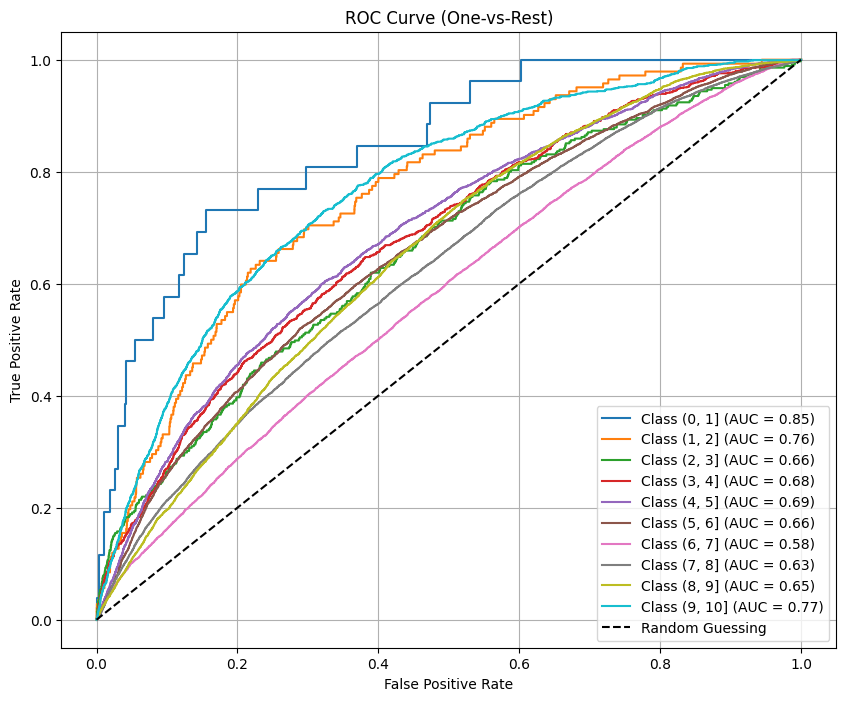

In [88]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()


In [89]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.6926610428756573)

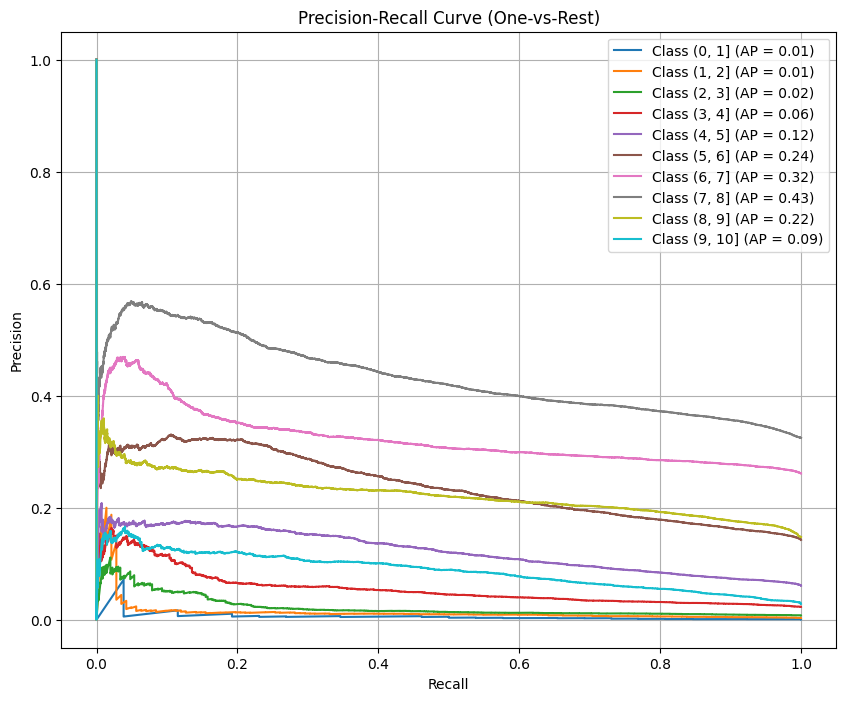

In [90]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()